In [1]:
import pandas as pd
import numpy as np

import string
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 12

In [2]:
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import classification_report, confusion_matrix

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
!ls

path_to_dataset.txt          website_classification.ipynb
website_classification.csv


In [5]:
df = pd.read_csv('website_classification.csv')
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [6]:
df.tail()

,Unnamed: 0,website_url,cleaned_website_text,Category
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.index.name = 'row_id'
df.head()

,website_url,cleaned_website_text,Category
row_id,,,
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['website_url', 'cleaned_website_text', 'category'], dtype='object')

In [9]:
# check missing values
df.isna().sum()

website_url             0
cleaned_website_text    0
category                0
dtype: int64

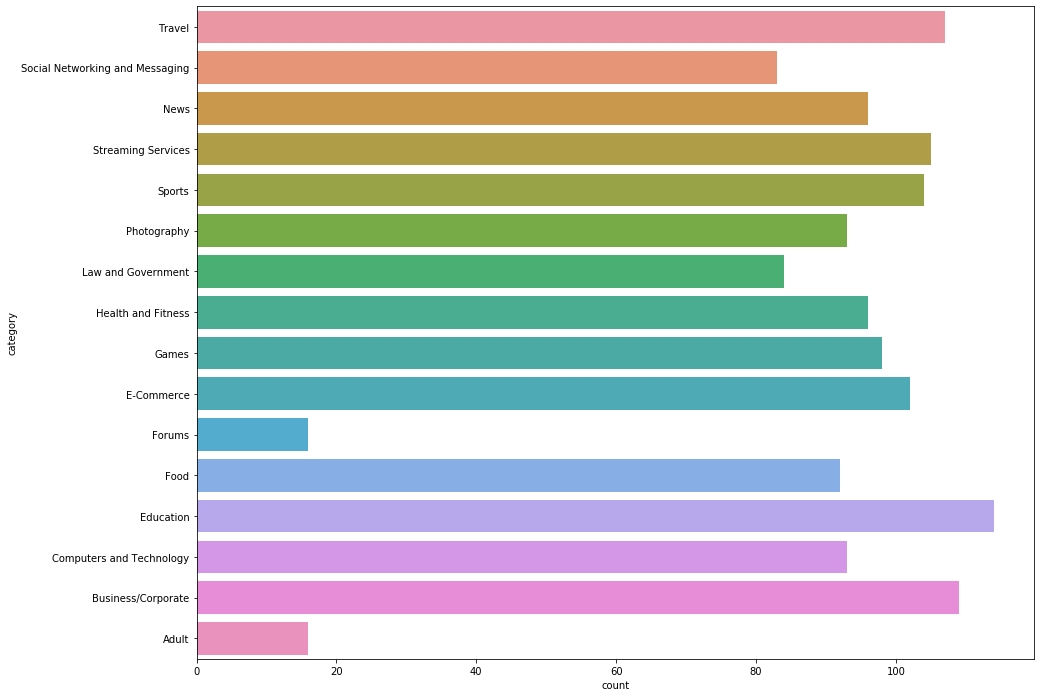

In [10]:
sns.countplot(y='category', data=df);

In [11]:
# import nltk
# nltk.download('wordnet')

In [12]:
all_categories = df['category'].unique()
all_categories

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

Preprocessing Text Data:

1. Tokenization
2. Remove punctuation
3. Reomve stop words
4. Lemmatization or Stemming


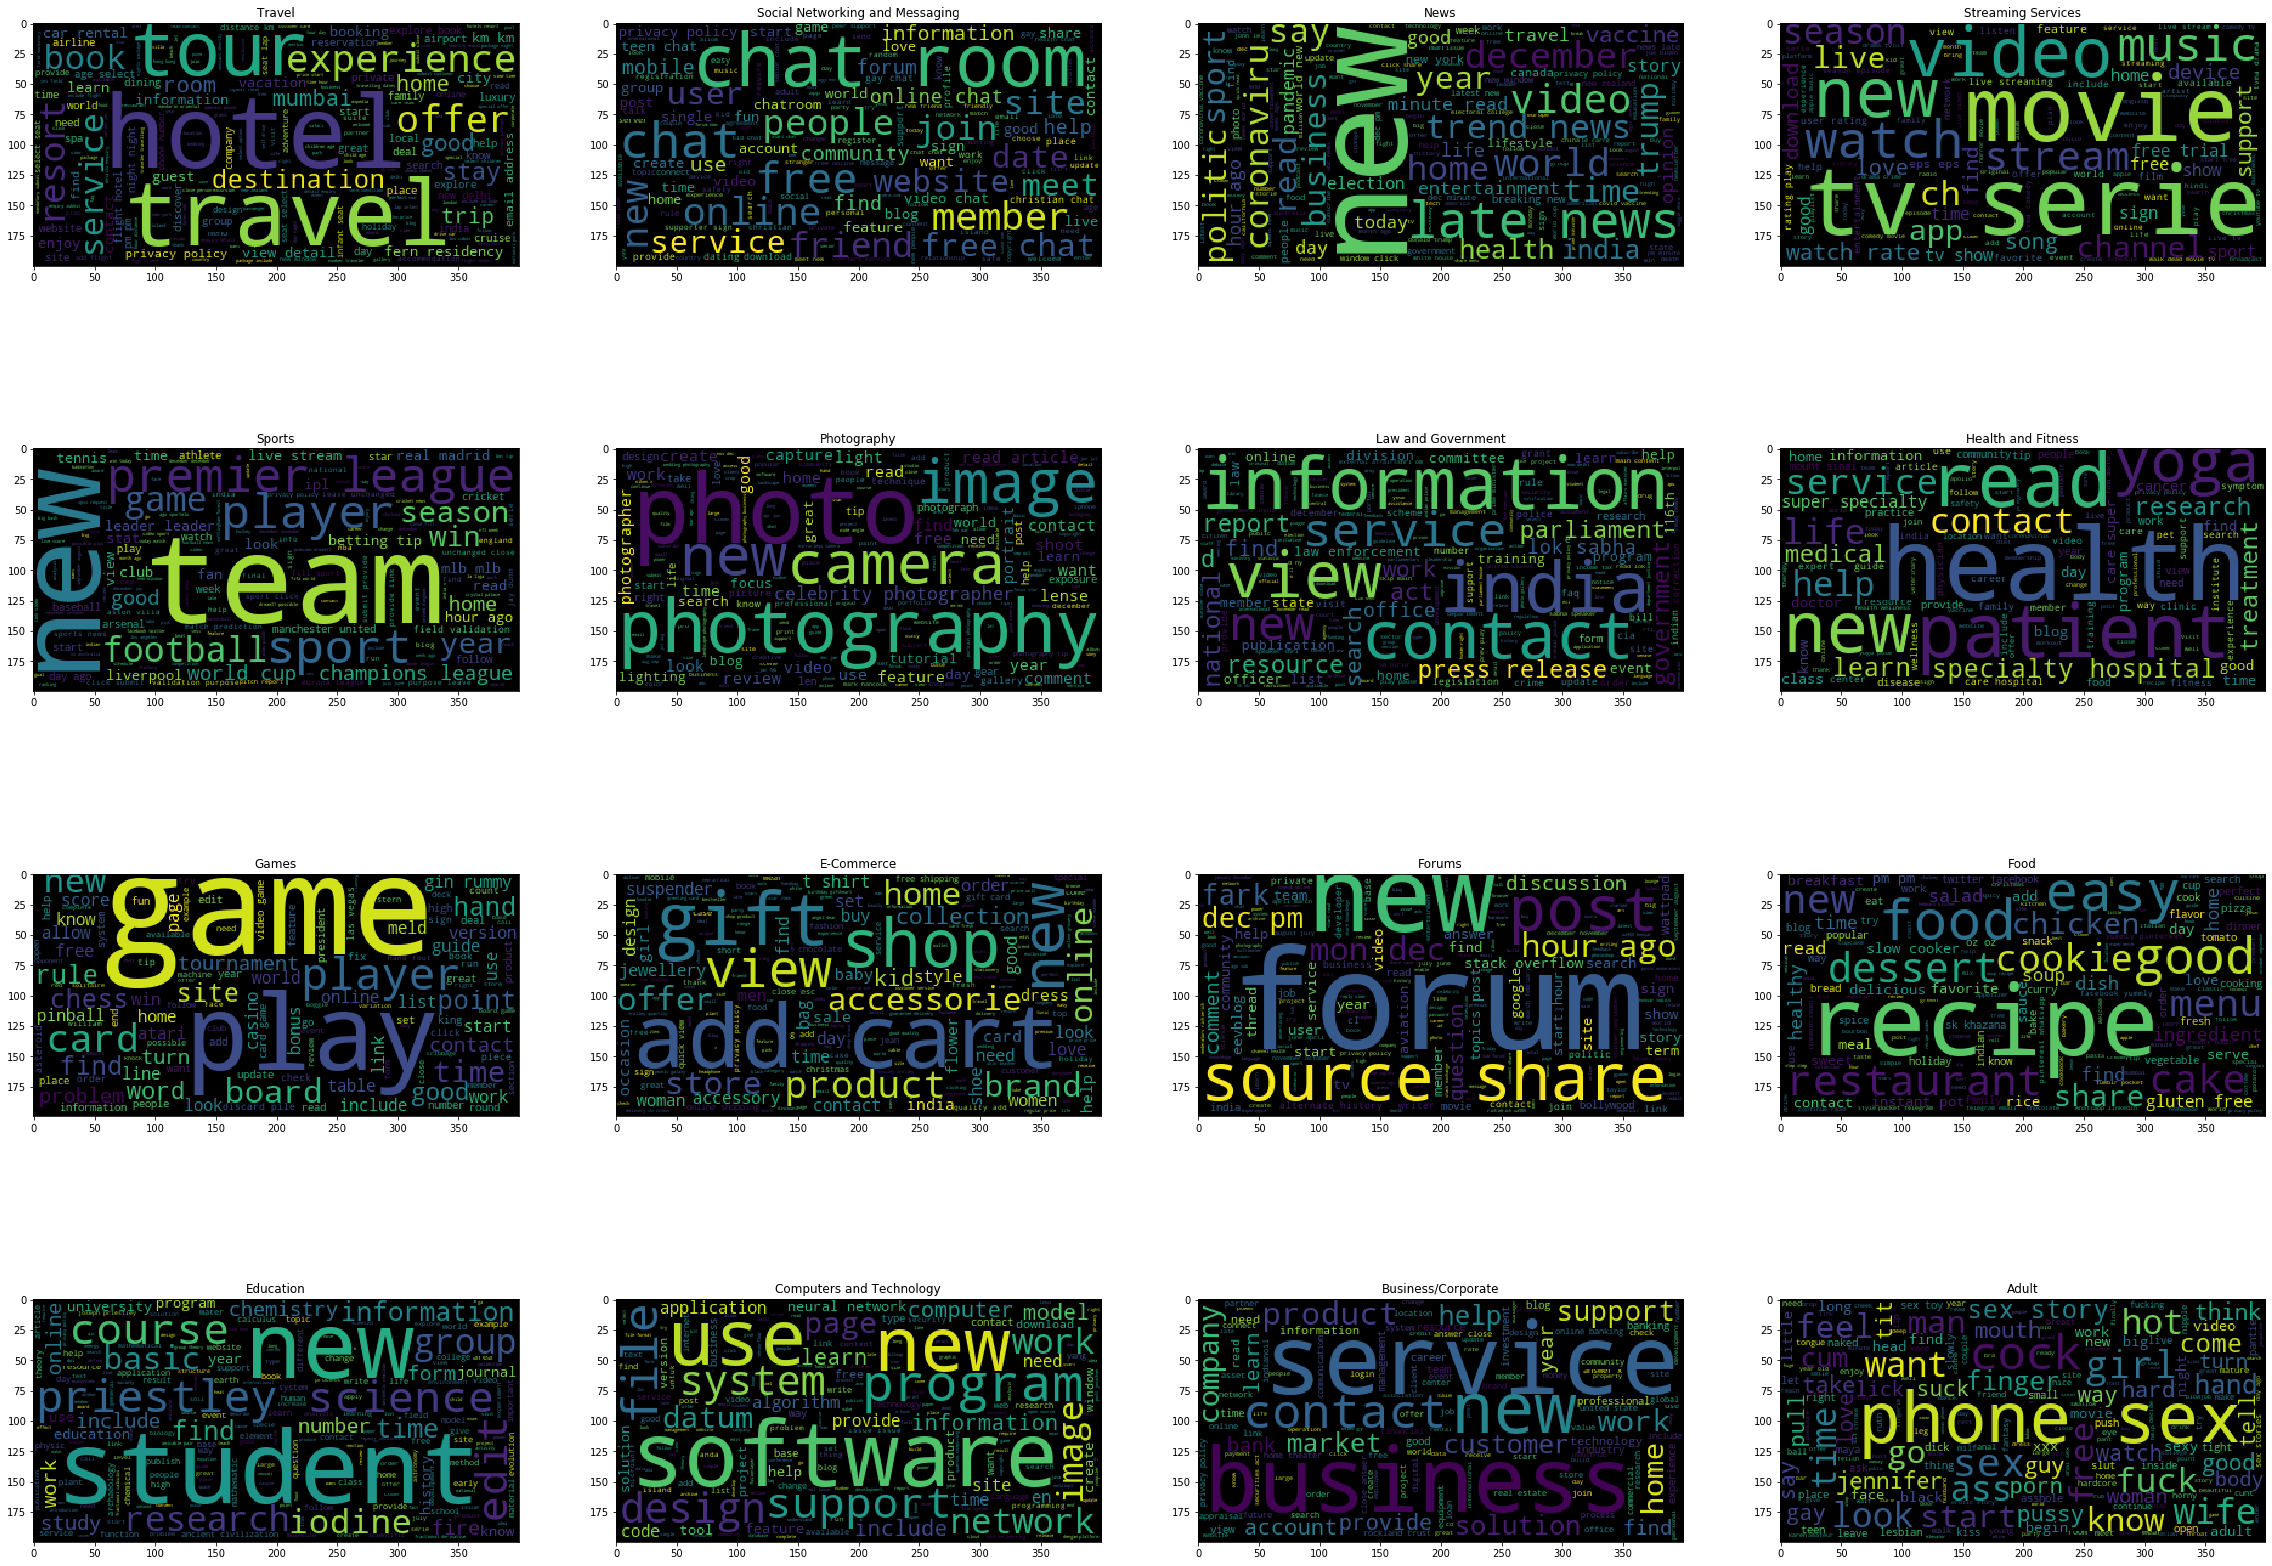

In [13]:
# create cloud of words for each catecories. 
stop_words = set(STOPWORDS)

plt.figure(figsize=(40, 30))

for i, _cat in enumerate(all_categories):
#     print('categories =', _cat)
    _df = df[df.category == _cat]
    text = _df['cleaned_website_text'].values
    

    cloud_words = WordCloud(stopwords=stop_words).generate(' '.join(text))
    plt.subplot(4, 4, i + 1)
    plt.title(_cat)
    plt.imshow(cloud_words)

In [14]:
def clean_punctuation(_text):
    _punctuation = [char for char in _text if char not in string.punctuation]
    _punctuation = ''.join(_punctuation)
    
    return _punctuation


def remove_stopword(_text):
    
    return ' '.join([word for word in _text.split() if word not in set(STOPWORDS)])


def stemming(_text):
    _stem = ' '.join([PorterStemmer().stem(w) for w in _text.split()])
    
    return _stem

def lemmatization(_text):
    _lem = ' '.join([WordNetLemmatizer().lemmatize(w) for w in _text.split()])
    
    return _lem

In [15]:
res = df['cleaned_website_text'].apply(clean_punctuation)
res = res.apply(remove_stopword)
res

row_id
0       official site good hotel accommodation big sav...
1       expedia hotel book sites use vacation work har...
2       tripadvisor hotel book sites previously deal p...
3       cheap flights search compare flights momondo f...
4       bot create free account create free account si...
                              ...                        
1403    old nude women porn mature granny sex horny ol...
1404    bdsm cams bdsm chat bondage cams free bdsm vid...
1405    porno dvd online european porn dvd cheap adult...
1406    anal dream house anal dream house anal dream h...
1407    world sex news daily sex news adult news eroti...
Name: cleaned_website_text, Length: 1408, dtype: object

In [16]:
res = res.apply(stemming)
# res = res.apply(lemmatization)

In [17]:
# res_lem = res.apply(lemmatization)

In [18]:
y = df['category']

In [19]:
X = CountVectorizer().fit_transform(res)

In [20]:
tfidf = TfidfTransformer()

In [21]:
X = TfidfTransformer().fit_transform(X)
print('X_shape =', X.shape)

X_shape = (1408, 49045)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [24]:
model = RandomForestClassifier(max_depth=11)

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [26]:
y_pred = model.predict(X_test)

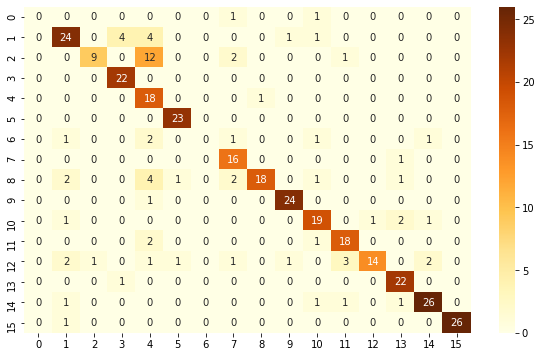

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='YlOrBr', annot=True)

In [28]:
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         2
             Business/Corporate       0.75      0.71      0.73        34
       Computers and Technology       0.90      0.38      0.53        24
                     E-Commerce       0.81      1.00      0.90        22
                      Education       0.41      0.95      0.57        19
                           Food       0.92      1.00      0.96        23
                         Forums       0.00      0.00      0.00         6
                          Games       0.70      0.94      0.80        17
             Health and Fitness       0.95      0.62      0.75        29
             Law and Government       0.92      0.96      0.94        25
                           News       0.76      0.79      0.78        24
                    Photography       0.78      0.86      0.82        21
Social Networking and Messaging       0.93      0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
